In [1]:
import os
import urllib
import tarfile

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path,exist_ok = True)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
fetch_housing_data()

In [2]:
import pandas as pd
def load_csv_data(path = './datasets'):
    csv_path = os.path.join(path,'train.csv')
    return pd.read_csv(csv_path,index_col = 'ld')
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [3]:
dataset = load_housing_data()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


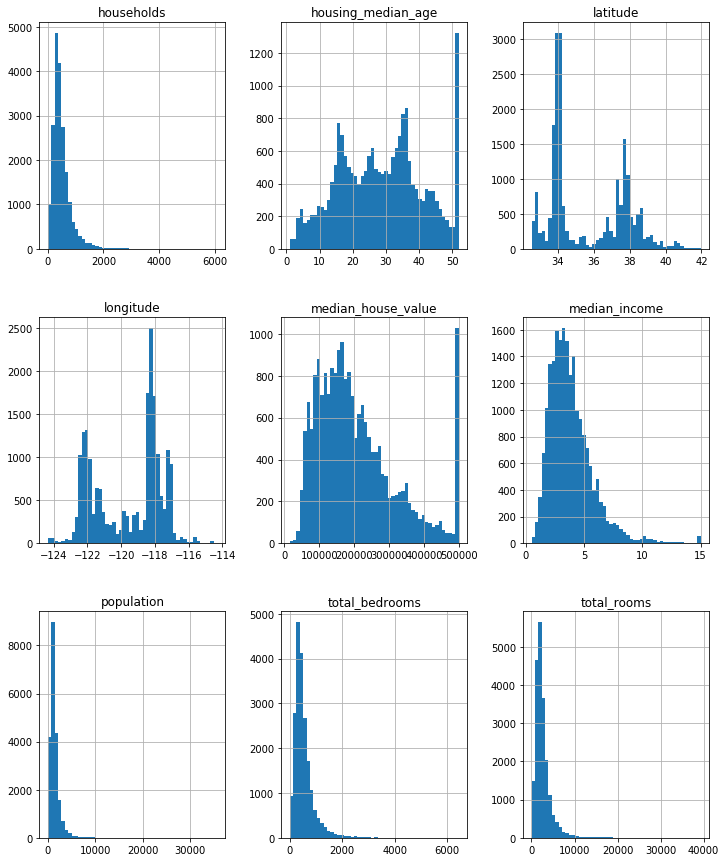

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins = 50 , figsize=(12,15))
plt.show()

In [9]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    train_indices = shuffled_indices[test_size:]
    test_indices = shuffled_indices[:test_size]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_set,test_set = split_train_test(dataset,0.2)
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(dataset,test_size = 0.2,random_state = 42)

In [12]:
dataset["income_cat"] = np.ceil(dataset["median_income"]/1.5)
dataset["income_cat"].where(dataset["income_cat"] < 5.0 ,5,inplace = True)

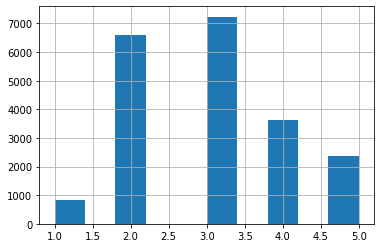

In [13]:
dataset["income_cat"].hist()

In [14]:
display(dataset["median_income"])

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [15]:
train_set,test_set = train_test_split(dataset,test_size = 0.2,random_state = 42)

In [16]:
train_set["income_cat"].value_counts()/len(train_set)

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64

In [17]:
test_set["income_cat"].value_counts()/len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(dataset,dataset["income_cat"]):
    strat_train_set = dataset.iloc[train_index]
    strat_test_set = dataset.iloc[test_index]

In [19]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [20]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [21]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

In [22]:
train_set,test_set = train_test_split(dataset,test_size = 0.2, random_state = 42)
compare_props = pd.DataFrame({
    "전체":income_cat_proportions(dataset),
    "계층":income_cat_proportions(strat_test_set),
    "무작위":income_cat_proportions(test_set)
}).sort_index()
compare_props["무작위%error"] = 100*compare_props["무작위"]/compare_props["전체"] - 100
compare_props["계층%error"] = 100*compare_props["계층"]/compare_props["전체"] -100
display(compare_props)

,전체,계층,무작위,무작위%error,계층%error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [23]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis = 1,inplace = True)

c:\python\venv\tensorflow\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'latitude'), Text(0.5, 0, 'longitude')]

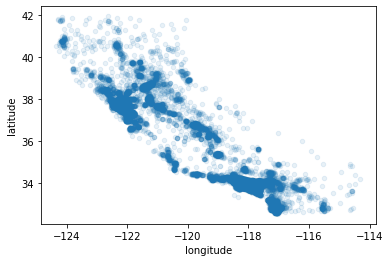

In [24]:
housing = strat_train_set.copy()
ax = housing.plot(kind = "scatter",x = "longitude",y = "latitude",alpha = 0.1)
ax.set(xlabel = 'longitude',ylabel = 'latitude')

c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


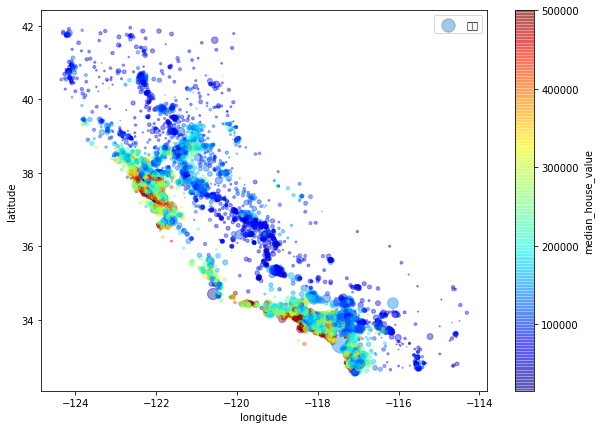

In [25]:
import matplotlib.pyplot as plt
ax = housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude',alpha = 0.4,
                 s = housing["population"]/100,label = "인구",figsize = (10,7),
                 c = "median_house_value",cmap = plt.get_cmap("jet"),colorbar = True,
                 sharex = False)
ax.set(xlabel = 'longitude',ylabel = 'latitude')
plt.legend()

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002932FCAE630>,
      dtype=object)

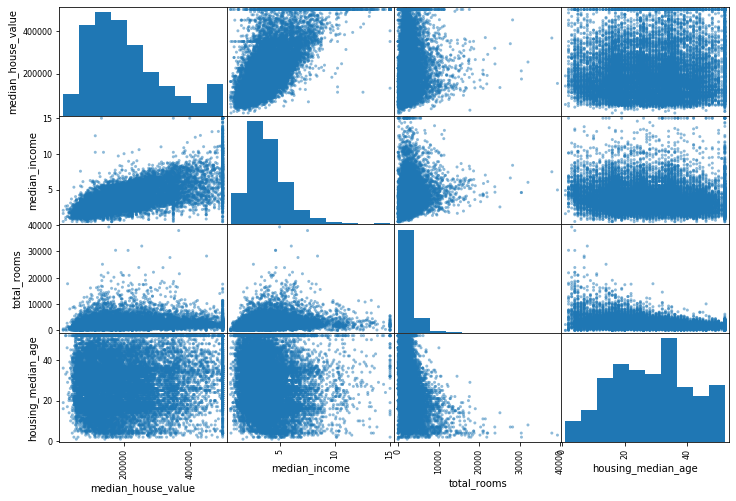

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize = (12,8))

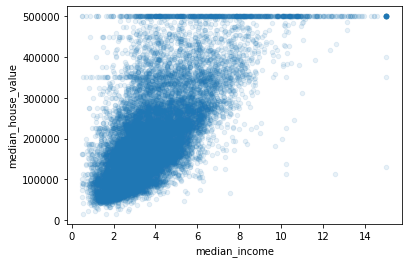

In [28]:
housing.plot(kind = "scatter",x = "median_income",y = "median_house_value",alpha = 0.1)

In [29]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"] /housing["households"]

In [30]:
corr_martrix = housing.corr()

In [31]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [32]:
housing = strat_train_set.drop("median_house_value",axis = 1)

In [33]:
housing_labels = strat_train_set["median_house_value"]

In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [35]:
from sklearn.impute import SimpleImputer
inputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity",axis = 1)
inputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [36]:
inputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
X = inputer.transform(housing_num)

In [38]:
housing_tr = pd.DataFrame(X,columns= housing_num.columns,index = list(housing.index.values))

In [39]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [40]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [41]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
print(housing_cat_encoded[:10])
print(housing_cat_encoded.shape)
print(housing_categories)

[0 0 1 2 0 2 0 2 0 0]
(16512,)
Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')


In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = 'auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [43]:
print(housing_cat_1hot.toarray())
print(type(housing_cat_1hot))

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
<class 'scipy.sparse.csr.csr_matrix'>


In [44]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_onehot = encoder.fit_transform(housing_cat)

print(housing_cat_onehot)
print(type(housing_cat_onehot))

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]
<class 'numpy.ndarray'>


In [45]:
print(pd.get_dummies(housing_cat).values)
display(pd.get_dummies(housing))

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,0,1,0,0,0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,0,1,0,0,0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,0,1,0,0,0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,1,0,0,0,0


In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix,bedrooms_ix, population_ix,household_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y = None):
        return self
    def transform(self,X,y = None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_room = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_room,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_room]

In [47]:
attr_adder = CombinedAttributesAdder(False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y = None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [50]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy = "median")),
    ("attribs_adder",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('cat_encoder',OneHotEncoder(categories = 'auto',sparse = False))
])

In [51]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_attribs),
    ("cat_encoder",OneHotEncoder(categories = 'auto'),cat_attribs),
])

In [52]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측 : ",lin_reg.predict(some_data_prepared))
print("라벨 : ",list(some_labels))

예측 :  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
라벨 :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [55]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [56]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)

In [57]:
print(tree_rmse)

0.0


In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring = 'neg_mean_squared_error',cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print("점수 :",scores)
    print("평균 :",scores.mean())
    print("표준편차 :",scores.std())
display_scores(tree_rmse_scores)

점수 : [69790.74107724 67761.63881907 71557.67732685 70293.82818799
 72565.82896527 75792.00155197 70354.05666826 70841.09945034
 76038.6442009  70145.89701128]
평균 : 71514.14132591677
표준편차 : 2491.798117281635


In [60]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,
                            scoring = "neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 : 69052.46136345083
표준편차 : 2731.6740017983425


In [61]:
from sklearn.ensemble import RandomForestRegressor  
forest_reg = RandomForestRegressor(n_estimators = 10,random_state = 42)
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("점수 :",forest_rmse)

점수 : 21933.31414779769


In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor(n_estimators = 10)
grid_search = GridSearchCV(forest_reg,
                          param_grid,
                          cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score=True
                          )
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [63]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [64]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64094.57678241849 {'max_features': 2, 'n_estimators': 3}
55671.35446817497 {'max_features': 2, 'n_estimators': 10}
52585.15844600827 {'max_features': 2, 'n_estimators': 30}
60673.688566909936 {'max_features': 4, 'n_estimators': 3}
53099.05744920498 {'max_features': 4, 'n_estimators': 10}
50376.27154430986 {'max_features': 4, 'n_estimators': 30}
58393.18613300938 {'max_features': 6, 'n_estimators': 3}
52584.042676374855 {'max_features': 6, 'n_estimators': 10}
50183.06064221669 {'max_features': 6, 'n_estimators': 30}
59118.55593542743 {'max_features': 8, 'n_estimators': 3}
52274.168890458226 {'max_features': 8, 'n_estimators': 10}
50178.000100643185 {'max_features': 8, 'n_estimators': 30}
61962.20460203071 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54037.73045202944 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61177.54559186969 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52840.89958351655 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [67]:
!pip install scipy

In [68]:
param_distribs = {
    'n_estimators':randint(low = 1, high = 200),
    'max_features':randint(low = 1, high = 8),
}
forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg,param_distributions=param_distribs,
                               n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error',
                               random_state = 42,n_jobs = -1)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [69]:
cvres = rnd_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.09470602e-02, 6.68087239e-02, 4.34082284e-02, 1.52597522e-02,
       1.45866031e-02, 1.55131162e-02, 1.44153916e-02, 3.64498774e-01,
       3.91185745e-02, 1.16057425e-01, 8.14578714e-02, 6.38623676e-03,
       1.45651373e-01, 7.92214330e-05, 2.10410189e-03, 3.70754703e-03])

In [71]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [72]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse = True)

[(0.3644987735647585, 'median_income'),
 (0.14565137264150685, 'INLAND'),
 (0.11605742512201726, 'pop_per_hhold'),
 (0.08145787144647314, 'bedrooms_per_room'),
 (0.07094706022965289, 'longitude'),
 (0.06680872392231577, 'latitude'),
 (0.04340822838334259, 'housing_median_age'),
 (0.03911857451117132, 'rooms_per_hhold'),
 (0.015513116208495057, 'population'),
 (0.015259752214631429, 'total_rooms'),
 (0.014586603054587003, 'total_bedrooms'),
 (0.014415391580877991, 'households'),
 (0.006386236762626341, '<1H OCEAN'),
 (0.003707547031353699, 'NEAR OCEAN'),
 (0.0021041018931630463, 'NEAR BAY'),
 (7.922143302712714e-05, 'ISLAND')]

In [73]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value',axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [74]:
final_rmse

47899.66955127121